# Pipeline for analyzing flow cytometry data

In [1]:
from FlowCytometryTools import *
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns

sns.set_style('white')
sns.set_style('ticks')
%matplotlib inline

In [2]:
# CaCl2 import
datadir = 'fcsfiles\\block1\\'
datadir2 = 'fcsfiles\\block2\\'

date = '20171221'

files = glob.glob(datadir + '*.fcs')
files2 = glob.glob(datadir2 + '*.fcs')

In [3]:
#datadir + '*.fcs'
files
#files[0]
#files[1][-7]+files[1][-6:-4]
#FCMeasurement(ID=files[1][-7]+files[1][-6:-4],datafile=files[1])


['fcsfiles\\block1\\Specimen_001_A1_A01.fcs',
 'fcsfiles\\block1\\Specimen_001_A2_A02.fcs',
 'fcsfiles\\block1\\Specimen_001_A3_A03.fcs',
 'fcsfiles\\block1\\Specimen_001_A4_A04.fcs',
 'fcsfiles\\block1\\Specimen_001_A5_A05.fcs',
 'fcsfiles\\block1\\Specimen_001_B1_B01.fcs',
 'fcsfiles\\block1\\Specimen_001_B2_B02.fcs',
 'fcsfiles\\block1\\Specimen_001_B3_B03.fcs',
 'fcsfiles\\block1\\Specimen_001_B4_B04.fcs',
 'fcsfiles\\block1\\Specimen_001_B5_B05.fcs',
 'fcsfiles\\block1\\Specimen_001_C1_C01.fcs',
 'fcsfiles\\block1\\Specimen_001_C2_C02.fcs',
 'fcsfiles\\block1\\Specimen_001_C3_C03.fcs',
 'fcsfiles\\block1\\Specimen_001_C4_C04.fcs',
 'fcsfiles\\block1\\Specimen_001_C5_C05.fcs',
 'fcsfiles\\block1\\Specimen_001_D1_D01.fcs',
 'fcsfiles\\block1\\Specimen_001_D2_D02.fcs',
 'fcsfiles\\block1\\Specimen_001_D3_D03.fcs',
 'fcsfiles\\block1\\Specimen_001_D4_D04.fcs',
 'fcsfiles\\block1\\Specimen_001_D5_D05.fcs',
 'fcsfiles\\block1\\Specimen_001_E1_E01.fcs',
 'fcsfiles\\block1\\Specimen_001_E

In [4]:
# see ONENOTE for full plate format
rows = ['A','B','C','D','E','F','G','H']  # for the light input # files
cols = ['01','02','03','04','05']

rows2 = ['A','B','C','D'] # for the pH8 # files2
cols2 = ['08','09','10','11','12']

In [5]:
plateraw = pd.DataFrame(index = rows)
plateraw2 = pd.DataFrame(index=rows2)
plateraw2

""
A
B
C
D


In [6]:
for i in range(len(files)):
    c = files[i][-6:-4]
    r = files[i][-7]
    call = r + c
    plateraw.loc[r,c] = FCMeasurement(ID = call, datafile = files[i])
    
for i in range(len(files2)):
    c = files2[i][-6:-4]
    r = files2[i][-7]
    call = r + c
    plateraw2.loc[r,c] = FCMeasurement(ID = call, datafile = files2[i])

In [7]:
len(files)
DUR=['15m','30m','60m','120m','240m']
type(DUR)

list

In [8]:
platesort = plateraw.loc[rows,cols]
platesort2 = plateraw2.loc[rows2,cols2]
platesort

,01,02,03,04,05
A,<FCMeasurement 'A01'>,<FCMeasurement 'A02'>,<FCMeasurement 'A03'>,<FCMeasurement 'A04'>,<FCMeasurement 'A05'>
B,<FCMeasurement 'B01'>,<FCMeasurement 'B02'>,<FCMeasurement 'B03'>,<FCMeasurement 'B04'>,<FCMeasurement 'B05'>
C,<FCMeasurement 'C01'>,<FCMeasurement 'C02'>,<FCMeasurement 'C03'>,<FCMeasurement 'C04'>,<FCMeasurement 'C05'>
D,<FCMeasurement 'D01'>,<FCMeasurement 'D02'>,<FCMeasurement 'D03'>,<FCMeasurement 'D04'>,<FCMeasurement 'D05'>
E,<FCMeasurement 'E01'>,<FCMeasurement 'E02'>,<FCMeasurement 'E03'>,<FCMeasurement 'E04'>,<FCMeasurement 'E05'>
F,<FCMeasurement 'F01'>,<FCMeasurement 'F02'>,<FCMeasurement 'F03'>,<FCMeasurement 'F04'>,<FCMeasurement 'F05'>
G,<FCMeasurement 'G01'>,<FCMeasurement 'G02'>,<FCMeasurement 'G03'>,<FCMeasurement 'G04'>,<FCMeasurement 'G05'>
H,<FCMeasurement 'H01'>,<FCMeasurement 'H02'>,<FCMeasurement 'H03'>,<FCMeasurement 'H04'>,<FCMeasurement 'H05'>


In [9]:
def cleandata(array,thresh):
    for i in range(len(array)):
        if array[i] < thresh:
            array[i] = np.nan
    return array

In [10]:
def FCdatastats(platesort,normalized,rows,cols,FITCthresh,mCherrythresh,SSCthresh):
    
    #Calculate the linear median, mean, and SD for each of the wells. Create two different Panels, one for FITC and one
    #for mCherry. In each Panel store a DataFrame containing the median, mean, SD, and CV

    empty = pd.DataFrame(index = rows, columns = cols)
    
    FITCstats = pd.Panel({'raw':empty, 'med':empty, 'avg':empty, 'sd':empty, 'cv':empty})
    mCherrystats = pd.Panel({'raw':empty, 'med':empty, 'avg':empty, 'sd':empty,'cv':empty})

    for row in rows:
        for col in cols:   
            
            try: 
                if normalized == 1:
                    FITC = cleandata(platesort.loc[row,col].data['FITC-H'].values,FITCthresh)/cleandata(platesort.loc[row,col].data['SSC-H'].values,SSCthresh)
                    mCherry = cleandata(platesort.loc[row,col].data['mCherry-H'].values,mCherrythresh)/cleandata(platesort.loc[row,col].data['SSC-H'].values,SSCthresh)

                elif normalized == 0:
                    FITC = cleandata(platesort.loc[row,col].data['FITC-H'].values,FITCthresh)
                    mCherry = cleandata(platesort.loc[row,col].data['mCherry-H'].values,mCherrythresh)
                    
                FITCstats.raw.loc[row,col] = FITC
                FITCstats.med.loc[row,col] = np.nanmedian(FITC)
                FITCstats.avg.loc[row,col] = np.nanmean(FITC)
                FITCstats.sd.loc[row,col] = np.nanstd(FITC)
                FITCstats.cv.loc[row,col] = FITCstats.sd.loc[row,col]/FITCstats.avg.loc[row,col]

                mCherrystats.raw.loc[row,col] = mCherry
                mCherrystats.med.loc[row,col] = np.nanmedian(mCherry)
                mCherrystats.avg.loc[row,col] = np.nanmean(mCherry)
                mCherrystats.sd.loc[row,col] = np.nanstd(mCherry)
                mCherrystats.cv.loc[row,col] = mCherrystats.sd.loc[row,col]/mCherrystats.avg.loc[row,col]
   
            except AttributeError:
                continue
    
    return [FITCstats, mCherrystats]

In [11]:
[FITCnorm_1, mCherrynorm_1] = FCdatastats(platesort,1,rows,cols,100,100,1)
#[FITC, mCherry] = FCdatastats(platesort,0,rows,cols,100,100,1)
[FITCnorm_2, mCherrynorm_2] = FCdatastats(platesort2,1,rows2,cols2,100,100,1)

C:\Users\susanychen\Anaconda2\lib\site-packages\pandas\core\internals.py:1129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = func(values, other)


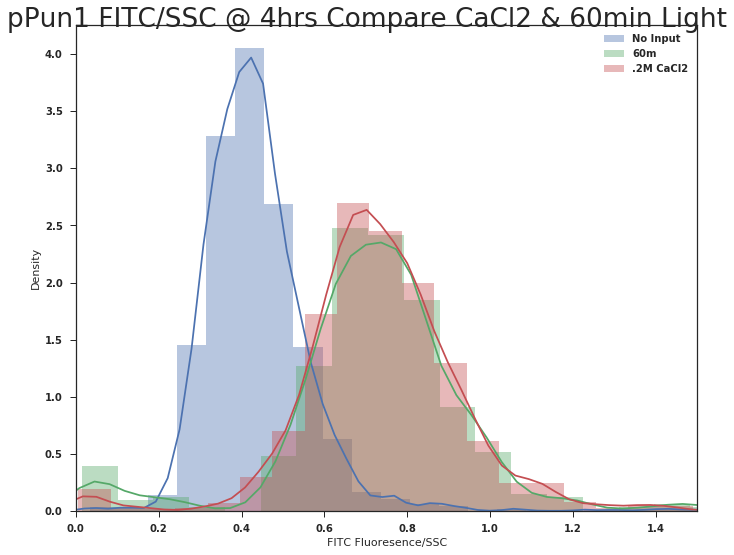

In [12]:
# only plot 0.2M and 60min -- on the same plot!
# plot pPun1 increasing duration with CaCl2 input
import numpy as np
import matplotlib.pyplot as plt

# font settings
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1, sharex = True, sharey = False, figsize=(10,8))

DUR=['15m','30m','60m','120m','240m']
STRESS = ['No Input','.2M CaCl2','.3M','.4M','pH8']
plt.suptitle('pPun1 FITC/SSC @ 4hrs Compare CaCl2 & 60min Light')

a=sns.distplot(FITCnorm_2.raw.iloc[1,0][~np.isnan(FITCnorm_2.raw.iloc[1,0])].astype(float),label=STRESS[0]) # 0M
a=sns.distplot(FITCnorm_1.raw.iloc[0,2][~np.isnan(FITCnorm_1.raw.iloc[0,2])].astype(float),label= DUR[2]) # 60min
a=sns.distplot(FITCnorm_2.raw.iloc[1,1][~np.isnan(FITCnorm_2.raw.iloc[1,1])].astype(float),label=STRESS[1]) # # 0.2M CaCl2
#a.title.set_text('Compare CaCl2 and 60min Light')
a.set_ylabel('Density')
a.legend()
plt.xlim([0 ,1.5])
ax.set_xlabel('FITC Fluoresence/SSC')
plt.tight_layout() 

dest = date + '_pPun1_dur+CaClInputs_HIST'
plt.savefig(dest + '.svg', bbox_inches='tight',dpi=300)
plt.savefig(dest + '.png', bbox_inches='tight',dpi=300)


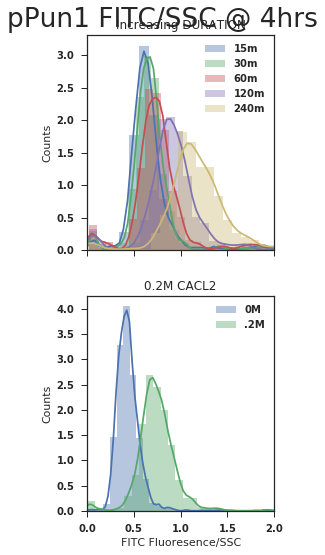

In [22]:
# plot pPun1 increasing duration with CaCl2 input
import numpy as np
import matplotlib.pyplot as plt

# font settings
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(2,1, sharex = True, sharey = False, figsize=(4,8))

DUR=['15m','30m','60m','120m','240m']
STRESS = ['0M','.2M','.3M','.4M','pH8']
plt.suptitle('pPun1 FITC/SSC @ 4hrs')
for j in range(5): # pun1 inc DUR
    a=sns.distplot(FITCnorm_1.raw.iloc[0,j][~np.isnan(FITCnorm_1.raw.iloc[0,j])].astype(float),ax=ax[0],label= DUR[j])
a.title.set_text('Increasing DURATION')
a.set_ylabel('Counts')
a.legend()
# CaCl2
for j in range(2): # pun1 natural stress
    a=sns.distplot(FITCnorm_2.raw.iloc[1,j][~np.isnan(FITCnorm_2.raw.iloc[1,j])].astype(float),ax=ax[1],label=STRESS[j])
a.title.set_text('0.2M CACL2')
a.set_ylabel('Counts')
a.legend()
plt.xlim([0 ,2])
ax[1].set_xlabel('FITC Fluoresence/SSC')
plt.tight_layout() 

#dest = 'C:\Users\susanychen\Google Drive\UCSF Graduate Research (El-Samad)\LANS OPTOGENETICS PROJECT\SYC Data\20170724_SYC428crzlanspFks2venus_optoplatedoses2to4096_durdose0m10m20m40m60m'
dest = date + '_pPun1_dur+CaClInputs_doseresp_HIST'
plt.savefig(dest + '.svg', bbox_inches='tight',dpi=300)
plt.savefig(dest + '.png', bbox_inches='tight',dpi=300)


In [26]:
## IMPORTANT: DO NOT RUN UNLESS YOU NEED TO RE-SAVE THE DATA AS A .MAT FILE!!!!!!!!!!!!!!!!!!!
## Extract distribution information -- YESSS!!! exporting this to Matlab!!!

dataA = []
for i in range(8):
    dataB =[]
    for j in range(5):
        dataB.append(FITCnorm_1.raw.iloc[i,j][~np.isnan(FITCnorm_1.raw.iloc[i,j])])
    dataA.append(dataB)

dataC = []
for i in range(4):
    dataD =[]
    for j in range(5):
        dataD.append(FITCnorm_2.raw.iloc[i,j][~np.isnan(FITCnorm_2.raw.iloc[i,j])])
    dataC.append(dataD)
    
import numpy as np
import scipy.io
#x = np.linspace(0, 2 * np.pi, 100)
#y = np.cos(x)

scipy.io.savemat('syc20171221_lightDUR_Cacl.mat', dict(plate1_20171221=dataA,plate2_20171221=dataC))
#type(x)

type(dataA)

list